In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cuda:0


In [7]:
import numpy as np

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.MNIST(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=100,
                                            shuffle=True,
                                            num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=100,
                                            shuffle=False, 
                                            num_workers=2)

classes = tuple(np.linspace(0, 9, 10, dtype=np.uint8))


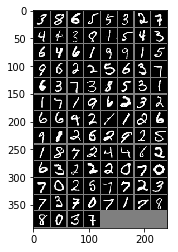

    3     8     6     5     5     3     2     7     4     4     3     8     1     5     4     3     6     4     6     1     9     9     1     5     9     6     2     2     5     6     3     7     6     3     7     3     8     5     3     1     1     7     1     9     6     2     3     2     6     6     4     2     1     1     2     6     9     1     2     6     2     9     2     5     1     8     7     2     4     4     6     2     6     3     2     2     2     0     7     0     7     0     2     5     7     7     2     3     7     3     7     0     7     1     7     8     8     0     3     7


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(100)))

In [31]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64 
        self.pool = nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


net = Net()


In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [33]:
import time

## On CPU

In [34]:
start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print(f'Finished Training. Elapsed Time is {time.time() - start}')

[1,     1] loss: 0.001
[1,     2] loss: 0.001
[1,     3] loss: 0.001
[1,     4] loss: 0.001
[1,     5] loss: 0.001
[1,     6] loss: 0.001
[1,     7] loss: 0.001
[1,     8] loss: 0.001
[1,     9] loss: 0.001
[1,    10] loss: 0.001
[1,    11] loss: 0.001
[1,    12] loss: 0.001
[1,    13] loss: 0.001
[1,    14] loss: 0.001
[1,    15] loss: 0.001
[1,    16] loss: 0.001
[1,    17] loss: 0.001
[1,    18] loss: 0.001
[1,    19] loss: 0.001
[1,    20] loss: 0.001
[1,    21] loss: 0.001
[1,    22] loss: 0.001
[1,    23] loss: 0.001
[1,    24] loss: 0.001
[1,    25] loss: 0.001
[1,    26] loss: 0.001
[1,    27] loss: 0.001
[1,    28] loss: 0.001
[1,    29] loss: 0.001
[1,    30] loss: 0.001
[1,    31] loss: 0.001
[1,    32] loss: 0.001
[1,    33] loss: 0.001
[1,    34] loss: 0.001
[1,    35] loss: 0.001
[1,    36] loss: 0.001
[1,    37] loss: 0.001
[1,    38] loss: 0.001
[1,    39] loss: 0.001
[1,    40] loss: 0.001
[1,    41] loss: 0.001
[1,    42] loss: 0.001
[1,    43] loss: 0.001
[1,    44] 

[1,   358] loss: 0.000
[1,   359] loss: 0.000
[1,   360] loss: 0.000
[1,   361] loss: 0.000
[1,   362] loss: 0.000
[1,   363] loss: 0.000
[1,   364] loss: 0.000
[1,   365] loss: 0.000
[1,   366] loss: 0.000
[1,   367] loss: 0.000
[1,   368] loss: 0.000
[1,   369] loss: 0.000
[1,   370] loss: 0.000
[1,   371] loss: 0.000
[1,   372] loss: 0.000
[1,   373] loss: 0.000
[1,   374] loss: 0.000
[1,   375] loss: 0.000
[1,   376] loss: 0.000
[1,   377] loss: 0.000
[1,   378] loss: 0.000
[1,   379] loss: 0.000
[1,   380] loss: 0.000
[1,   381] loss: 0.000
[1,   382] loss: 0.000
[1,   383] loss: 0.000
[1,   384] loss: 0.000
[1,   385] loss: 0.000
[1,   386] loss: 0.000
[1,   387] loss: 0.000
[1,   388] loss: 0.000
[1,   389] loss: 0.000
[1,   390] loss: 0.000
[1,   391] loss: 0.000
[1,   392] loss: 0.000
[1,   393] loss: 0.000
[1,   394] loss: 0.000
[1,   395] loss: 0.000
[1,   396] loss: 0.000
[1,   397] loss: 0.000
[1,   398] loss: 0.000
[1,   399] loss: 0.000
[1,   400] loss: 0.000
[1,   401] 

[2,   115] loss: 0.000
[2,   116] loss: 0.000
[2,   117] loss: 0.000
[2,   118] loss: 0.000
[2,   119] loss: 0.000
[2,   120] loss: 0.000
[2,   121] loss: 0.000
[2,   122] loss: 0.000
[2,   123] loss: 0.000
[2,   124] loss: 0.000
[2,   125] loss: 0.000
[2,   126] loss: 0.000
[2,   127] loss: 0.000
[2,   128] loss: 0.000
[2,   129] loss: 0.000
[2,   130] loss: 0.000
[2,   131] loss: 0.000
[2,   132] loss: 0.000
[2,   133] loss: 0.000
[2,   134] loss: 0.000
[2,   135] loss: 0.000
[2,   136] loss: 0.000
[2,   137] loss: 0.000
[2,   138] loss: 0.000
[2,   139] loss: 0.000
[2,   140] loss: 0.000
[2,   141] loss: 0.000
[2,   142] loss: 0.000
[2,   143] loss: 0.000
[2,   144] loss: 0.000
[2,   145] loss: 0.000
[2,   146] loss: 0.000
[2,   147] loss: 0.000
[2,   148] loss: 0.000
[2,   149] loss: 0.000
[2,   150] loss: 0.000
[2,   151] loss: 0.000
[2,   152] loss: 0.000
[2,   153] loss: 0.000
[2,   154] loss: 0.000
[2,   155] loss: 0.000
[2,   156] loss: 0.000
[2,   157] loss: 0.000
[2,   158] 

[2,   473] loss: 0.000
[2,   474] loss: 0.000
[2,   475] loss: 0.000
[2,   476] loss: 0.000
[2,   477] loss: 0.000
[2,   478] loss: 0.000
[2,   479] loss: 0.000
[2,   480] loss: 0.000
[2,   481] loss: 0.000
[2,   482] loss: 0.000
[2,   483] loss: 0.000
[2,   484] loss: 0.000
[2,   485] loss: 0.000
[2,   486] loss: 0.000
[2,   487] loss: 0.000
[2,   488] loss: 0.000
[2,   489] loss: 0.000
[2,   490] loss: 0.000
[2,   491] loss: 0.000
[2,   492] loss: 0.000
[2,   493] loss: 0.000
[2,   494] loss: 0.000
[2,   495] loss: 0.000
[2,   496] loss: 0.000
[2,   497] loss: 0.000
[2,   498] loss: 0.000
[2,   499] loss: 0.000
[2,   500] loss: 0.000
[2,   501] loss: 0.000
[2,   502] loss: 0.000
[2,   503] loss: 0.000
[2,   504] loss: 0.000
[2,   505] loss: 0.000
[2,   506] loss: 0.000
[2,   507] loss: 0.000
[2,   508] loss: 0.000
[2,   509] loss: 0.000
[2,   510] loss: 0.000
[2,   511] loss: 0.000
[2,   512] loss: 0.000
[2,   513] loss: 0.000
[2,   514] loss: 0.000
[2,   515] loss: 0.000
[2,   516] 

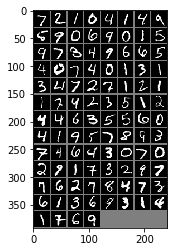

GroundTruth:      7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     9     3     7     4     6     4     3     0     7     0     2     9     1     7     3     2     9     7     7     6     2     7     8     4     7     3     6     1     3     6     9     3     1     4     1     7     6     9


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(100)))

## On GPU

In [28]:
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print(f'Finished Training. Elapsed TIme is {time.time() - start}')

[1,     1] loss: 0.000
[1,     2] loss: 0.000
[1,     3] loss: 0.000
[1,     4] loss: 0.000
[1,     5] loss: 0.000
[1,     6] loss: 0.000
[1,     7] loss: 0.000
[1,     8] loss: 0.000
[1,     9] loss: 0.000
[1,    10] loss: 0.000
[1,    11] loss: 0.000
[1,    12] loss: 0.000
[1,    13] loss: 0.000
[1,    14] loss: 0.000
[1,    15] loss: 0.000
[1,    16] loss: 0.000
[1,    17] loss: 0.000
[1,    18] loss: 0.000
[1,    19] loss: 0.000
[1,    20] loss: 0.000
[1,    21] loss: 0.000
[1,    22] loss: 0.000
[1,    23] loss: 0.000
[1,    24] loss: 0.000
[1,    25] loss: 0.000
[1,    26] loss: 0.000
[1,    27] loss: 0.000
[1,    28] loss: 0.000
[1,    29] loss: 0.000
[1,    30] loss: 0.000
[1,    31] loss: 0.000
[1,    32] loss: 0.000
[1,    33] loss: 0.000
[1,    34] loss: 0.000
[1,    35] loss: 0.000
[1,    36] loss: 0.000
[1,    37] loss: 0.000
[1,    38] loss: 0.000
[1,    39] loss: 0.000
[1,    40] loss: 0.000
[1,    41] loss: 0.000
[1,    42] loss: 0.000
[1,    43] loss: 0.000
[1,    44] 

[1,   384] loss: 0.000
[1,   385] loss: 0.000
[1,   386] loss: 0.000
[1,   387] loss: 0.000
[1,   388] loss: 0.000
[1,   389] loss: 0.000
[1,   390] loss: 0.000
[1,   391] loss: 0.000
[1,   392] loss: 0.000
[1,   393] loss: 0.000
[1,   394] loss: 0.000
[1,   395] loss: 0.000
[1,   396] loss: 0.000
[1,   397] loss: 0.000
[1,   398] loss: 0.000
[1,   399] loss: 0.000
[1,   400] loss: 0.000
[1,   401] loss: 0.000
[1,   402] loss: 0.000
[1,   403] loss: 0.000
[1,   404] loss: 0.000
[1,   405] loss: 0.000
[1,   406] loss: 0.000
[1,   407] loss: 0.000
[1,   408] loss: 0.000
[1,   409] loss: 0.000
[1,   410] loss: 0.000
[1,   411] loss: 0.000
[1,   412] loss: 0.000
[1,   413] loss: 0.000
[1,   414] loss: 0.000
[1,   415] loss: 0.000
[1,   416] loss: 0.000
[1,   417] loss: 0.000
[1,   418] loss: 0.000
[1,   419] loss: 0.000
[1,   420] loss: 0.000
[1,   421] loss: 0.000
[1,   422] loss: 0.000
[1,   423] loss: 0.000
[1,   424] loss: 0.000
[1,   425] loss: 0.000
[1,   426] loss: 0.000
[1,   427] 

[2,   154] loss: 0.000
[2,   155] loss: 0.000
[2,   156] loss: 0.000
[2,   157] loss: 0.000
[2,   158] loss: 0.000
[2,   159] loss: 0.000
[2,   160] loss: 0.000
[2,   161] loss: 0.000
[2,   162] loss: 0.000
[2,   163] loss: 0.000
[2,   164] loss: 0.000
[2,   165] loss: 0.000
[2,   166] loss: 0.000
[2,   167] loss: 0.000
[2,   168] loss: 0.000
[2,   169] loss: 0.000
[2,   170] loss: 0.000
[2,   171] loss: 0.000
[2,   172] loss: 0.000
[2,   173] loss: 0.000
[2,   174] loss: 0.000
[2,   175] loss: 0.000
[2,   176] loss: 0.000
[2,   177] loss: 0.000
[2,   178] loss: 0.000
[2,   179] loss: 0.000
[2,   180] loss: 0.000
[2,   181] loss: 0.000
[2,   182] loss: 0.000
[2,   183] loss: 0.000
[2,   184] loss: 0.000
[2,   185] loss: 0.000
[2,   186] loss: 0.000
[2,   187] loss: 0.000
[2,   188] loss: 0.000
[2,   189] loss: 0.000
[2,   190] loss: 0.000
[2,   191] loss: 0.000
[2,   192] loss: 0.000
[2,   193] loss: 0.000
[2,   194] loss: 0.000
[2,   195] loss: 0.000
[2,   196] loss: 0.000
[2,   197] 

[2,   538] loss: 0.000
[2,   539] loss: 0.000
[2,   540] loss: 0.000
[2,   541] loss: 0.000
[2,   542] loss: 0.000
[2,   543] loss: 0.000
[2,   544] loss: 0.000
[2,   545] loss: 0.000
[2,   546] loss: 0.000
[2,   547] loss: 0.000
[2,   548] loss: 0.000
[2,   549] loss: 0.000
[2,   550] loss: 0.000
[2,   551] loss: 0.000
[2,   552] loss: 0.000
[2,   553] loss: 0.000
[2,   554] loss: 0.000
[2,   555] loss: 0.000
[2,   556] loss: 0.000
[2,   557] loss: 0.000
[2,   558] loss: 0.000
[2,   559] loss: 0.000
[2,   560] loss: 0.000
[2,   561] loss: 0.000
[2,   562] loss: 0.000
[2,   563] loss: 0.000
[2,   564] loss: 0.000
[2,   565] loss: 0.000
[2,   566] loss: 0.000
[2,   567] loss: 0.000
[2,   568] loss: 0.000
[2,   569] loss: 0.000
[2,   570] loss: 0.000
[2,   571] loss: 0.000
[2,   572] loss: 0.000
[2,   573] loss: 0.000
[2,   574] loss: 0.000
[2,   575] loss: 0.000
[2,   576] loss: 0.000
[2,   577] loss: 0.000
[2,   578] loss: 0.000
[2,   579] loss: 0.000
[2,   580] loss: 0.000
[2,   581] 